# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
df_test = pd.read_csv("Bigmart_Test.csv")
df_train = pd.read_csv("Bigmart_Train.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Data Analysis & Data Cleaning 

In [5]:
print(df_test.shape)
print(df_train.shape)

(5681, 11)
(8523, 12)


In [6]:
print(df_test.columns)
print(df_train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [7]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


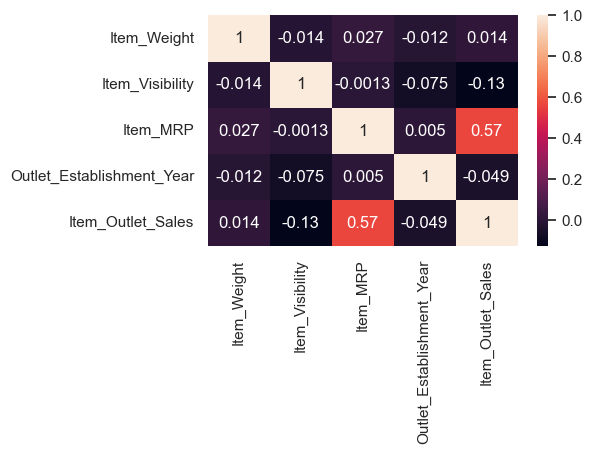

In [10]:
plt.figure(figsize=(5,3))
sns.set(font_scale=1)

sns.heatmap(df_train.corr(), annot=True)

plt.show()

In [11]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
df_train['Item_Fat_Content'].replace(to_replace=['LF','low fat'], value='Low Fat', inplace=True)
df_train['Item_Fat_Content'].replace(to_replace=['reg'], value='Regular', inplace=True)

df_test['Item_Fat_Content'].replace(to_replace=['LF','low fat'], value='Low Fat', inplace=True)
df_test['Item_Fat_Content'].replace(to_replace=['reg'], value='Regular', inplace=True)

In [13]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
df_test["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [15]:
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
df_train.groupby("Item_Fat_Content")["Item_Type"].value_counts()

Item_Fat_Content  Item_Type            
Low Fat           Household                910
                  Snack Foods              692
                  Fruits and Vegetables    630
                  Health and Hygiene       520
                  Frozen Foods             450
                  Dairy                    418
                  Soft Drinks              374
                  Canned                   341
                  Baking Goods             329
                  Hard Drinks              214
                  Meat                     170
                  Others                   169
                  Breads                   140
                  Starchy Foods             82
                  Breakfast                 41
                  Seafood                   37
Regular           Fruits and Vegetables    602
                  Snack Foods              508
                  Frozen Foods             406
                  Baking Goods             319
                  Ca

In [17]:
df_train.groupby("Outlet_Location_Type")["Outlet_Type"].value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 1                Supermarket Type1    1860
                      Grocery Store         528
Tier 2                Supermarket Type1    2785
Tier 3                Supermarket Type3     935
                      Supermarket Type1     932
                      Supermarket Type2     928
                      Grocery Store         555
Name: Outlet_Type, dtype: int64

In [18]:
for feature in df_train.columns:
    if df_train[feature].isnull().sum() > 1:
        print("{} Feature has {}% Missing values ".format(feature,round(df_train[feature].isnull().mean()*100,1)))

Item_Weight Feature has 17.2% Missing values 
Outlet_Size Feature has 28.3% Missing values 


In [19]:
for feature in df_test.columns:
    if df_test[feature].isnull().sum() > 1:
        print("{} Feature has {}% Missing values ".format(feature,round(df_test[feature].isnull().mean()*100,1)))

Item_Weight Feature has 17.2% Missing values 
Outlet_Size Feature has 28.3% Missing values 


In [20]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [22]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

#Outlet_Size is categorical column so we fill it with Mode Imputation
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

In [23]:
df_train.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)

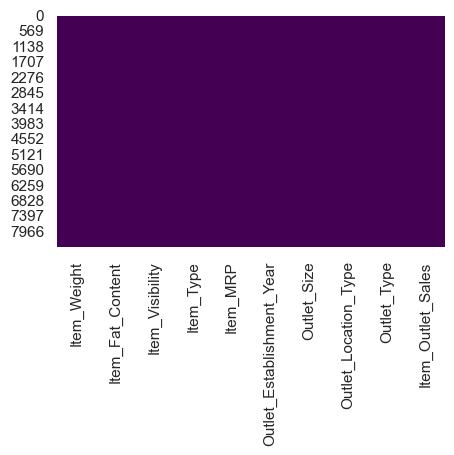

In [24]:
plt.figure(figsize=(5,3))
sns.set(font_scale=1)

sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')

plt.show()

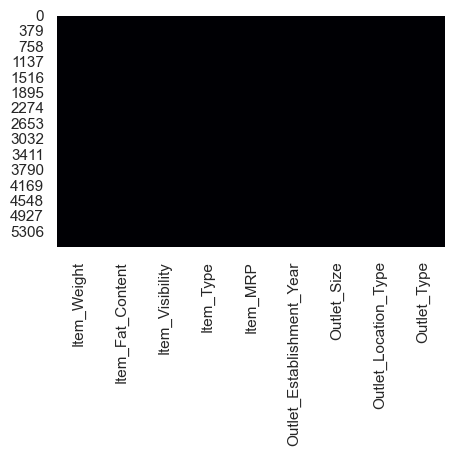

In [25]:
plt.figure(figsize=(5,3))
sns.set(font_scale=1)

sns.heatmap(df_test.isnull(), cbar=False, cmap='magma')

plt.show()

In [26]:
df_train.groupby("Outlet_Size")["Outlet_Size"].count()

Outlet_Size
High       932
Medium    5203
Small     2388
Name: Outlet_Size, dtype: int64

In [27]:
df_train.groupby("Outlet_Establishment_Year")["Outlet_Establishment_Year"].count()

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: Outlet_Establishment_Year, dtype: int64

In [1]:
plt.figure(figsize=(5,3))
sns.set(font_scale=0.8)

ax = sns.countplot(x= df_train["Outlet_Establishment_Year"], data=df_train, palette='winter')

ax.set_facecolor('none')
plt.show()

NameError: name 'plt' is not defined

In [29]:
df_train.groupby("Outlet_Location_Type")["Outlet_Location_Type"].count()

Outlet_Location_Type
Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

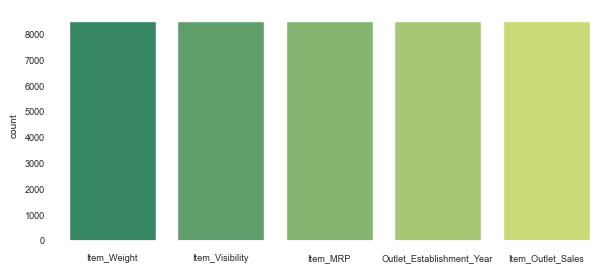

In [30]:
plt.figure(figsize=(7,3))
sns.set(font_scale=0.6)

ax = sns.countplot(data=df_train, palette= 'summer')

ax.set_facecolor('none')
plt.show()

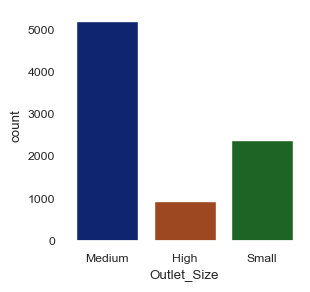

In [31]:
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)

ax = sns.countplot(x=df_train['Outlet_Size'] ,palette='dark')

ax.set_facecolor('none')
plt.show()

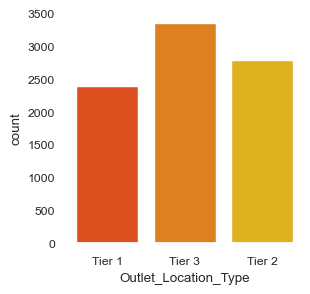

In [32]:
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)

ax = sns.countplot(x=df_train['Outlet_Location_Type'] , palette='autumn')

ax.set_facecolor('none')
plt.show()

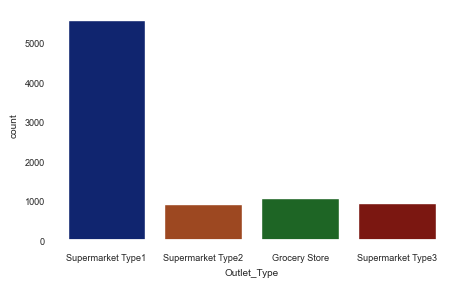

In [33]:
plt.figure(figsize=(5,3))
sns.set(font_scale=0.6)

ax = sns.countplot(x=df_train['Outlet_Type'] ,palette='dark')

ax.set_facecolor('none')
plt.show()

# 1st Approach Label Encoder

In [34]:
#From One Hot Encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
df_le = df_train
df_le['Item_Fat_Content']= le.fit_transform(df_le['Item_Fat_Content'])
df_le['Item_Type']= le.fit_transform(df_le['Item_Type'])
df_le['Outlet_Size']= le.fit_transform(df_le['Outlet_Size'])
df_le['Outlet_Location_Type']= le.fit_transform(df_le['Outlet_Location_Type'])
df_le['Outlet_Type']= le.fit_transform(df_le['Outlet_Type'])
df_le

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [37]:
df_le.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

# Splitting our data into train and test files

In [39]:
#Assign x and y and get dummies because of object type entries
X = df_le.drop(["Item_Outlet_Sales"], axis=1)
y = df_le["Item_Outlet_Sales"]

In [53]:
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import metrics

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(y_test) # This is the output....

5640     444.7544
2569    4402.2696
619      534.6374
2368    5206.5560
6188    1011.3502
          ...    
8122    2648.5524
4551    3593.3226
8330     610.5386
754     1221.0772
1796     828.9210
Name: Item_Outlet_Sales, Length: 1705, dtype: float64


In [55]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RFR', RandomForestRegressor()))
models.append(('XGBR', XGBRegressor()))

In [56]:
results = []
names = []
for name, model in models:
    obj = model
    names.append(name)
    obj.fit(X_train, y_train)
    y_pred = obj.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({'name': name, 'r2': r2, 'mae': mae, 'mse': mse})
    print(f'{name}: R2={r2:.2f}, MAE={mae:.2f}, MSE={mse:.2f}')


LR: R2=0.50, MAE=912.91, MSE=1491851.43
RFR: R2=0.56, MAE=798.14, MSE=1339928.49
XGBR: R2=0.52, MAE=829.91, MSE=1438009.13


<Figure size 100x100 with 0 Axes>

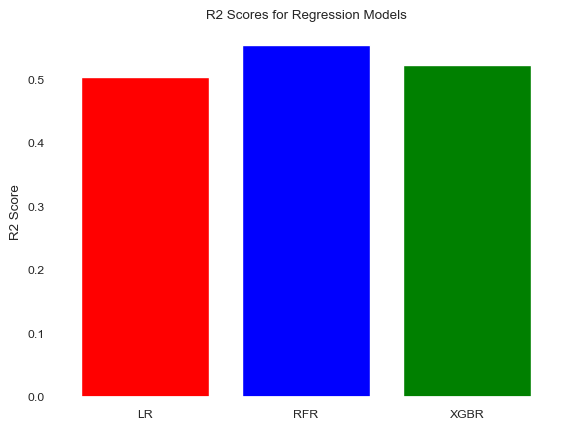

In [73]:
r2_scores = [result['r2'] for result in results]
names = [result['name'] for result in results]

plt.figure(figsize=(1,1))
sns.set(font_scale=0.8)

fig, ax = plt.subplots()
ax.bar(names, r2_scores, color=['red', 'blue', 'green'])
ax.set_ylabel('R2 Score')
ax.set_title('R2 Scores for Regression Models')
ax.set_facecolor('none')

plt.show()

<Figure size 100x100 with 0 Axes>

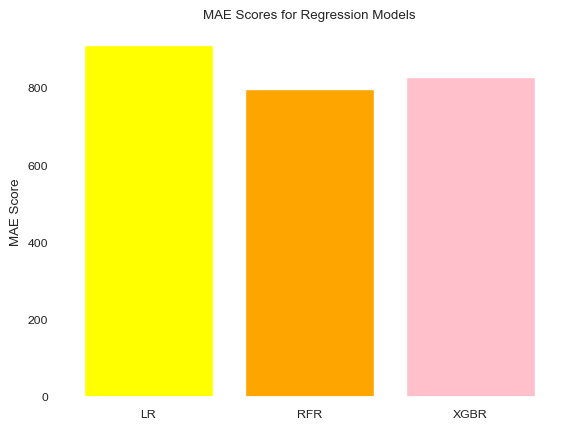

In [68]:
mae_scores = [result['mae'] for result in results]
names = [result['name'] for result in results]

plt.figure(figsize=(1,1))
sns.set(font_scale=0.8)

fig, ax = plt.subplots()
ax.bar(names, mae_scores, color=['Yellow', 'Orange', 'Pink'])
ax.set_ylabel('MAE Score')
ax.set_title('MAE Scores for Regression Models')
ax.set_facecolor('none')

plt.show()

<Figure size 100x100 with 0 Axes>

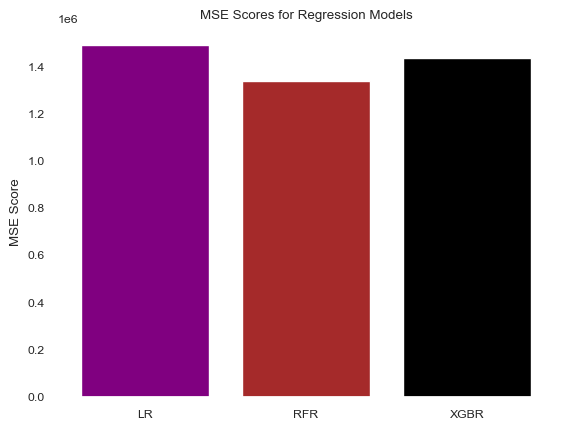

In [69]:
mse_scores = [result['mse'] for result in results]
names = [result['name'] for result in results]

plt.figure(figsize=(1,1))
sns.set(font_scale=0.8)

fig, ax = plt.subplots()
ax.bar(names, mse_scores, color=['Purple', 'Brown', 'Black'])
ax.set_ylabel('MSE Score')
ax.set_title('MSE Scores for Regression Models')
ax.set_facecolor('none')

plt.show()

# 2nd Approach using dummies

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Creating dummies on train dataset

In [ ]:
df_train.head()

In [ ]:
dummies_train = pd.get_dummies(df_train[['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']])

In [ ]:
merged_train = pd.concat([df_train, dummies_train], axis = 'columns')
merged_train

In [ ]:
merged_train.columns

In [ ]:
final_train = merged_train.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type',
                      'Item_Fat_Content_Regular','Item_Type_Soft Drinks','Outlet_Size_High','Outlet_Location_Type_Tier 1','Outlet_Type_Supermarket Type1'], axis = 'columns')
final_train

# Creating dummies on test dataset

In [ ]:
df_test.head()

In [ ]:
dummies_test = pd.get_dummies(df_test[['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']])
dummies_test

In [ ]:
merged_test = pd.concat([df_test, dummies_test], axis = 'columns')
merged_test

In [ ]:
merged_test.columns

In [ ]:
final_test = merged_test.drop(['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type',
                      'Item_Fat_Content_Regular','Item_Type_Soft Drinks','Outlet_Size_High','Outlet_Location_Type_Tier 1','Outlet_Type_Supermarket Type1'], axis = 'columns')
final_test

In [ ]:
print(final_train.shape)
print(final_test.shape)

# Splitting our data into train and test files

In [ ]:
#Assign x and y and get dummies because of object type entries
X = final_train.drop(["Item_Outlet_Sales"], axis=1)
y = final_train["Item_Outlet_Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(y_test) # This is the output...

In [ ]:
print(final_train.dtypes)
print(final_test.dtypes)

In [ ]:
model.fit(X,y)

In [ ]:
model.score(X,y)

In [ ]:
X.columns

In [ ]:
X.shape

In [ ]:
X.max()

In [ ]:
X.min()

In [ ]:
#Put the values according to the above ranges
model.predict([[15,
                0.23,
                160,
                2023,
                0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
                0,1,
                0,1,
                0,1,2,]])